In [10]:
using AutomotiveDrivingModels
using AutoViz
using LsqFit
using Reactive, Interact
using EzXML
using AutoUrban

## Construction Roadway

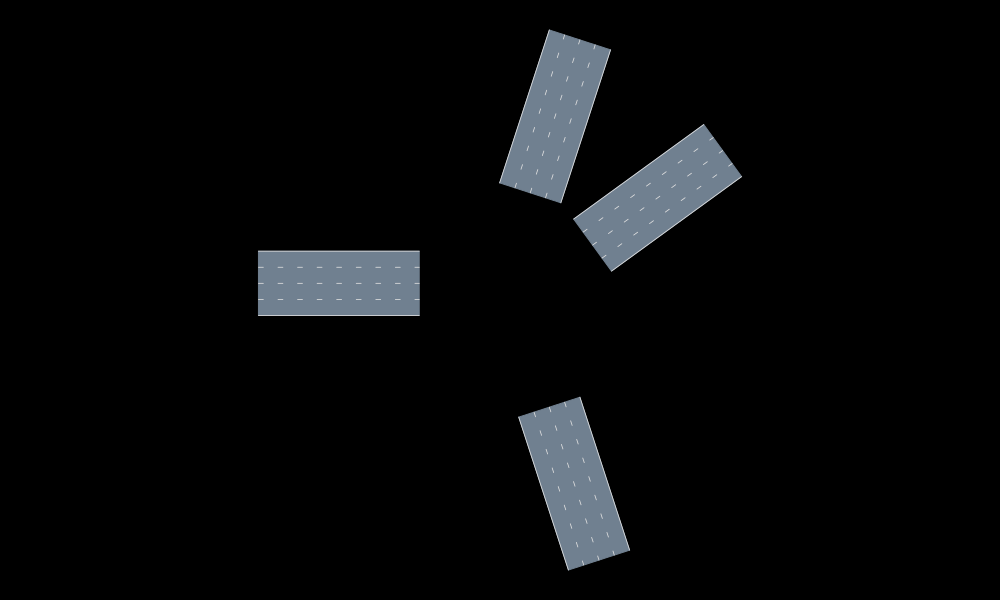

In [2]:
#Add segments
roadway = Roadway()
origin = VecSE2(-50.0,0.0,0.0)
laneLength = 30.0
nlanes = 4
add_line!(origin,nlanes,laneLength,roadway)
origin = VecSE2(0.0,-20.0,-0.4*pi)
laneLength = 30.0
nlanes = 4
add_line!(origin,nlanes,laneLength,roadway)
origin = VecSE2(15.0,8.0,0.2*pi)
laneLength = 30.0
nlanes = 4
add_line!(origin,nlanes,laneLength,roadway)
origin = VecSE2(5.0,20.0,0.4*pi)
laneLength = 30.0
nlanes = 4
add_line!(origin,nlanes,laneLength,roadway)
roadway

In [12]:
#Specify connections
#A Junction contains several Connections
#Connection(1,3) means connect all lanes from segment 1 to segment 3
#Connection(1,2,0,[(1,1),(2,2)]) means connect segment 1 and 2 from lane 1 in segment 1 to lane 2 in segment 2,
#lane 2 in segment 1 to lane 2 in segment2
junctions=[Junction([Connection(1,2,0,[(1,1),(2,2)]),Connection(1,3),Connection(1,4)])]

1-element Array{AutoUrban.Junction,1}:
 AutoUrban.Junction(AutoUrban.Connection[AutoUrban.Connection(1,2,0,Tuple{Int64,Int64}[(1,1),(2,2)]),AutoUrban.Connection(1,3,0,Tuple{Int64,Int64}[]),AutoUrban.Connection(1,4,0,Tuple{Int64,Int64}[])])

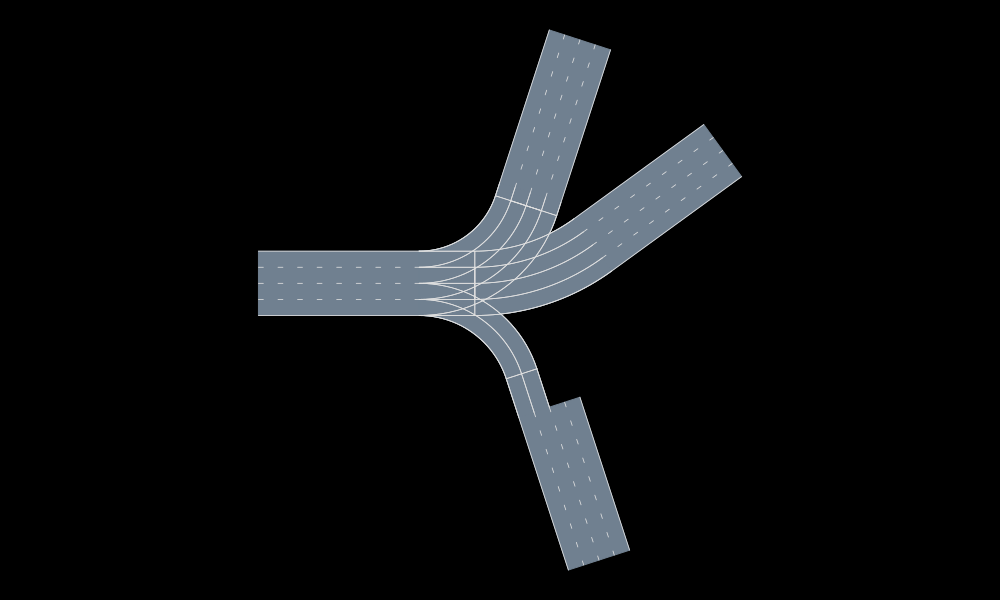

In [13]:
#Add all junctions
for junction in junctions
    add_junction!(junction,roadway)
end
roadway

In [14]:
#Initialze
doc,r = initialize_XML()

(EzXML.Document(EzXML.Node(<DOCUMENT_NODE@0x0000000004ba2e90>)),EzXML.Node(<ELEMENT_NODE@0x00000000049ec2f0>))

In [15]:
#Convert roadway and ignoring any junctions
convert_roadway!(r,roadway)

In [16]:
#Handle junctions
handle_junctions(r,junctions,roadway)

In [17]:
prettyprint(doc)

<?xml version="1.0" encoding="UTF-8"?>
<OpenDRIVE>
  <header revMajor="1" revMinor="4" name="" version="1.00" data="Tue Mar 21 15:00:43 2017" north="0" south="0" east="0" west="0"></header>
  <road name="" id="1" length="30.0" junction="-1">
    <type s="0" type="rural"/>
    <link><successor elementType="junction" elementId="1"/></link>
    <planView>
      <geometry s="0.0" x="-50.0" y="0.0" hdg="0.0" length="30.0">
        <line/>
      </geometry>
    </planView>
    <lanes>
      <laneOffset s="0.0" a="10.5" b="0" c="0" d="0"/>
      <laneSection s="0">
        <left/>
        <center>
          <lane id="0" type="driving" level="false"><roadMark sOffset="0.0" type="solid" weight="standard" color="standard" width="0.5" laneChange="both"/></lane>
        </center>
        <right>
          <lane id="-4" type="driving" level="false">
            <width sOffset="0" a="3.0" b="0.0" c="0.0" d="0.0"/>
            <roadMark sOffset="0.0" type="broken" weight="standard" color="standard" w

In [18]:
#Write out the file
write("test_out.xodr",doc)

25012